# Neural Network Classification

- Binary Classification
> Target can be one of two options, e.g. yes or no
- Multi class Classification
> Target can be one of more than two options
- Multi label Classification
> Target can be assigned more than one option

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/dev/2.deep learning/2. image-processing/img/'

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

plt.ion();

# Read Image

In [ ]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
print(f'{image_BGR.shape}')
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

(471, 589, 3)


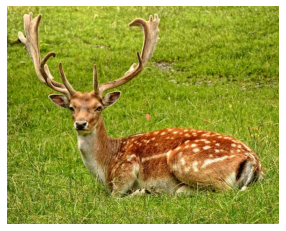

In [ ]:
plt.imshow(img_RGB)
plt.axis('off')
plt.show()

In [ ]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)
print(f'{image_gray.shape}')

(471, 589)


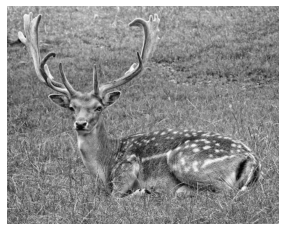

In [ ]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

# Saving on Image

In [ ]:
cv2.imwrite(args.default_path+"deer_gray.jpg", image_gray)

True

(471, 589)


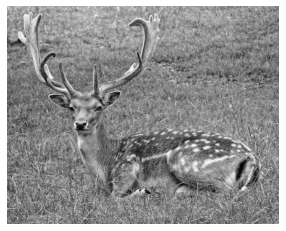

In [ ]:
image_gray = cv2.imread(args.default_path+"deer_gray.jpg", cv2.IMREAD_GRAYSCALE)
print(f'{image_gray.shape}')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

# Resizing

In [ ]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

In [ ]:
height, width = img_RGB.shape[:2]
height, width

(471, 589)

img_resize: (117, 147, 3) / img_RGB: (471, 589, 3)


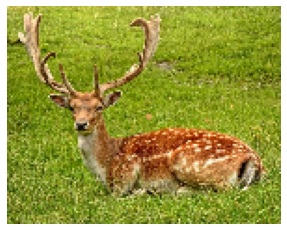

In [ ]:
img_resize = cv2.resize(img_RGB, (int(width / 4), int(height / 4)), interpolation = cv2.INTER_CUBIC)
print(f'img_resize: {img_resize.shape} / img_RGB: {img_RGB.shape}')

plt.imshow(img_resize)
plt.axis('off')
plt.show()

# Cropping

In [ ]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
height, width = img_RGB.shape[:2]
height, width

(471, 589)

cropped_image: (200, 180, 3) / img_RGB: (471, 589, 3)


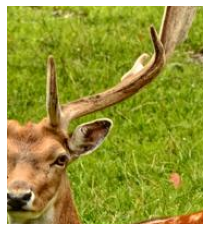

In [ ]:
# Cropping an image
cropped_image = img_RGB[80:280, 150:330]

print(f'cropped_image: {cropped_image.shape} / img_RGB: {img_RGB.shape}')
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

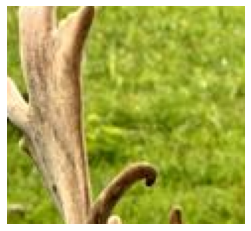

In [45]:
cropped_image = img_RGB[20:130, 30:150]

plt.imshow(cropped_image)
plt.axis('off')
plt.show()

# Rotating

In [ ]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

In [ ]:
height, width = img_RGB.shape[:2]
center = (width/2, height/2)
center

(294.5, 235.5)

rotated_image: (471, 589, 3) / img_RGB: (471, 589, 3)


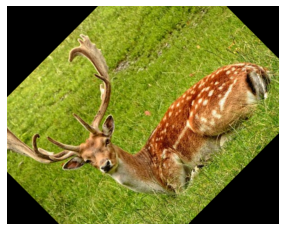

In [ ]:
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img_RGB, M=rotate_matrix, dsize=(width, height))

print(f'rotated_image: {rotated_image.shape} / img_RGB: {img_RGB.shape}')
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

# Thresholding

아래 4개 이미지에서 왼쪽 상단은 원본 이미지, 아래쪽 이미지 2개는 adaptiveThreshold를 적용한 이미지이다.

In [ ]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)

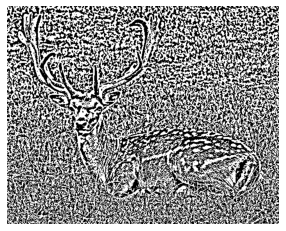

In [ ]:
image_thr1 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(image_thr1, cmap='gray')
plt.axis('off')
plt.show()

ADAPTIVE_THRESH_GAUSSIAN_C

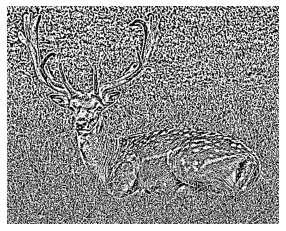

In [ ]:
image_thr2 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(image_thr2, cmap='gray')
plt.axis('off')
plt.show()

# Bluring

In [ ]:
image_BGR = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_COLOR)
# cv2.imread는 BGR로 불러오므로 plt를 이용하려면 RGB로 바꿔줘야 함
img_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)

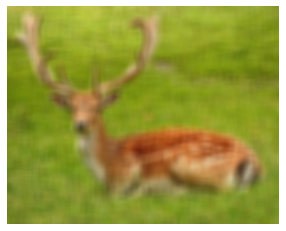

In [ ]:
val = 21

img_blur = cv2.blur(img_RGB, (val, val))
plt.imshow(img_blur)
plt.axis('off')
plt.show()

# Erosion, Dilation
- Erosion : 이미지 침식
- Dilation : 이미지 팽창

In [ ]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)

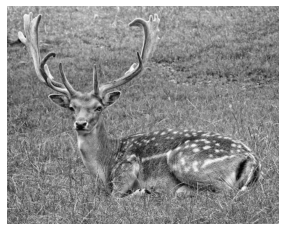

In [ ]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
kernel = np.ones((3,3), np.uint8)

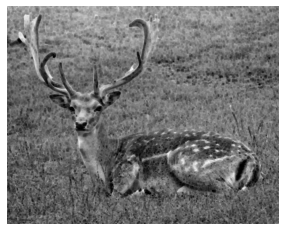

In [ ]:
image_erosion = cv2.erode(image_gray, kernel, iterations=1)
plt.imshow(image_erosion, cmap='gray')
plt.axis('off')
plt.show()

# Dilation
> cv2.dilate(img, kernel, iterations=1)
> - iterations: Erosion 반복 횟수

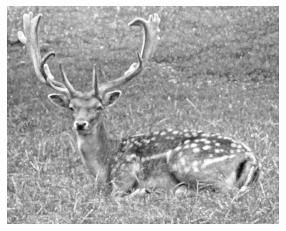

In [ ]:
image_dilate = cv2.dilate(image_gray, kernel, iterations=1)
plt.imshow(image_dilate, cmap='gray')
plt.axis('off')
plt.show()

# [Edge](https://blog.naver.com/samsjang/220507996391)

In [ ]:
image_gray = cv2.imread(args.default_path+"deer.jpg", cv2.IMREAD_GRAYSCALE)

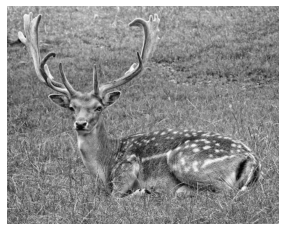

In [ ]:
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

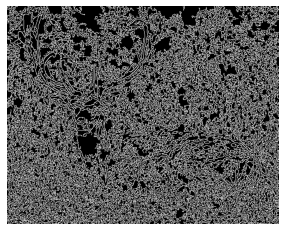

In [ ]:
image_edge1 = cv2.Canny(image_gray, 50, 300)
plt.imshow(image_edge1, cmap='gray')
plt.axis('off')
plt.show()

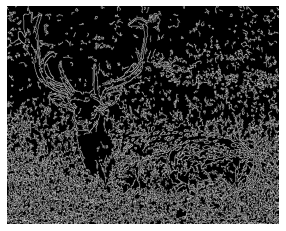

In [ ]:
image_edge2 = cv2.Canny(image_gray, 150, 300)
plt.imshow(image_edge2, cmap='gray')
plt.axis('off')
plt.show()

### 가우시안 필터 적용
이미지에서 노이즈가 있으면 엣지를 제대로 찾는 것이 어려울 수 있습니다.     
따라서 `처음에는 5x5 가우시안 필터를 이용해 이미지의 노이즈를 줄여주고, Edge를 사용합니다.`

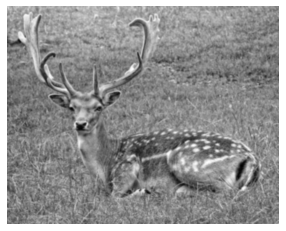

In [ ]:
val = 5

image_gray_blur = cv2.GaussianBlur(image_gray, (val, val), 0)

plt.imshow(image_gray_blur, cmap='gray')
plt.axis('off')
plt.show()

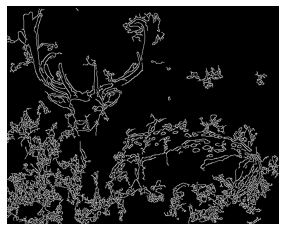

In [ ]:
image_edge1 = cv2.Canny(image_gray_blur, 50, 300)
plt.imshow(image_edge1, cmap='gray')
plt.axis('off')
plt.show()

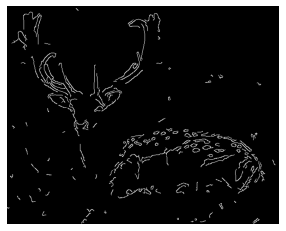

In [ ]:
image_edge2 = cv2.Canny(image_gray_blur, 150, 300)
plt.imshow(image_edge2, cmap='gray')
plt.axis('off')
plt.show()

In [50]:
from PIL import Image
im = Image.open(args.default_path+"deer.jpg")
logo = Image.open(args.default_path+"logo_pillow.png")

In [57]:
tmp_im1 = im.copy()

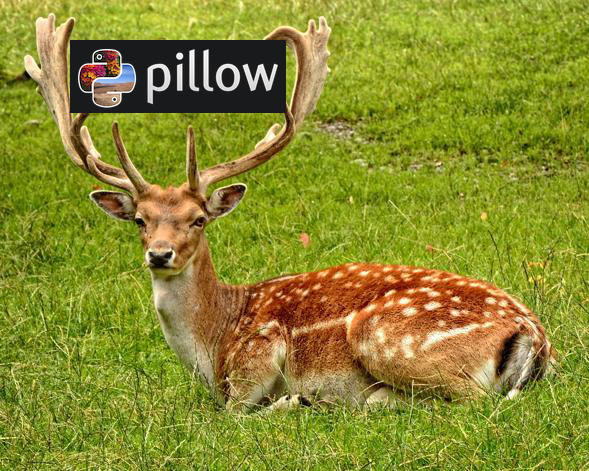

In [71]:
tmp_im1 = im.copy()
position = (70, 40)
tmp_im1.paste(logo, position)
tmp_im1

In [70]:
rgb_im = logo.convert('RGB')

# 지정한 좌표(1, 400)의 색상을 r,g,b 변수에 넣음
r, g, b = rgb_im.getpixel((20, 20)) 

print(r)
print(g)
print(b)

28
29
32


In [ ]:
import cv2
import numpy as np

